# Economic Analysis

## Economic Data Analysis with Fred(API) & Pandas(Library)

In [20]:
!pip install fredapi 

## Importing API 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'e458f1f1c4f72a8b773f4957e38a09b6'

## Create The Fred Object

In [22]:
fred = Fred(api_key=fred_key)

## Search for economic data

In [23]:
sp_search = fred.search('S&P', order_by='popularity')

In [37]:
sp_search.head(30)

id realtime_start realtime_end  \
series id                                                            
BAMLH0A0HYM2              BAMLH0A0HYM2     2024-06-03   2024-06-03   
CSUSHPINSA                  CSUSHPINSA     2024-06-03   2024-06-03   
SP500                            SP500     2024-06-03   2024-06-03   
MEHOINUSA672N            MEHOINUSA672N     2024-06-03   2024-06-03   
BAMLH0A0HYM2EY          BAMLH0A0HYM2EY     2024-06-03   2024-06-03   
BAMLC0A0CM                  BAMLC0A0CM     2024-06-03   2024-06-03   
CSUSHPISA                    CSUSHPISA     2024-06-03   2024-06-03   
DJIA                              DJIA     2024-06-03   2024-06-03   
MEHOINUSA646N            MEHOINUSA646N     2024-06-03   2024-06-03   
BAMLHE00EHYIEY          BAMLHE00EHYIEY     2024-06-03   2024-06-03   
SPCS20RSA                    SPCS20RSA     2024-06-03   2024-06-03   
BAMLHE00EHYIOAS        BAMLHE00EHYIOAS     2024-06-03   2024-06-03   
BAMLC0A0CMEY              BAMLC0A0CMEY     2024-06-03   2024-06-03   
SFXRSA                          SFXRSA     2024-06-03   2024-06-03   
BAMLHYH0A0HYM2TRIV  BAMLHYH0A0HYM2TRIV     2024-06-03   2024-06-03   
LXXRSA                          LXXRSA     2024-06-03   2024-06-03   
DDDM01USA156NWDB      DDDM01USA156NWDB     2024-06-03   2024-06-03   
STLENI                          STLENI     2024-06-03   2024-06-03   
SEXRNSA                        SEXRNSA     2024-06-03   2024-06-03   
RTFPNAUSA632NRUG      RTFPNAUSA632NRUG     2024-06-03   2024-06-03   
SDXRSA                          SDXRSA     2024-06-03   2024-06-03   
LABSHPUSA156NRUG      LABSHPUSA156NRUG     2024-06-03   2024-06-03   
NYXRSA                          NYXRSA     2024-06-03   2024-06-03   
MEHOINUSCAA646N        MEHOINUSCAA646N     2024-06-03   2024-06-03   
CHXRSA                          CHXRSA     2024-06-03   2024-06-03   
DAXRNSA                        DAXRNSA     2024-06-03   2024-06-03   
VXVCLS                          VXVCLS     2024-06-03   2024-06-03   
BOXRSA                          BOXRSA     2024-06-03   2024-06-03   
BAMLCC0A0CMTRIV        BAMLCC0A0CMTRIV     2024-06-03   2024-06-03   
PHXRNSA                        PHXRNSA     2024-06-03   2024-06-03   

                                                                title  \
series id                                                               
BAMLH0A0HYM2        ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                         S&P 500   
MEHOINUSA672N       Real Median Household Income in the United States   
BAMLH0A0HYM2EY           ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM          ICE BofA US Corporate Index Option-Adjusted Sp...   
CSUSHPISA           S&P CoreLogic Case-Shiller U.S. National Home ...   
DJIA                                     Dow Jones Industrial Average   
MEHOINUSA646N            Median Household Income in the United States   
BAMLHE00EHYIEY         ICE BofA Euro High Yield Index Effective Yield   
SPCS20RSA           S&P CoreLogic Case-Shiller 20-City Composite H...   
BAMLHE00EHYIOAS     ICE BofA Euro High Yield Index Option-Adjusted...   
BAMLC0A0CMEY              ICE BofA US Corporate Index Effective Yield   
SFXRSA              S&P CoreLogic Case-Shiller CA-San Francisco Ho...   
BAMLHYH0A0HYM2TRIV  ICE BofA US High Yield Index Total Return Inde...   
LXXRSA              S&P CoreLogic Case-Shiller CA-Los Angeles Home...   
DDDM01USA156NWDB    Stock Market Capitalization to GDP for United ...   
STLENI              St. Louis Fed Economic News Index: Real GDP No...   
SEXRNSA             S&P CoreLogic Case-Shiller WA-Seattle Home Pri...   
RTFPNAUSA632NRUG    Total Factor Productivity at Constant National...   
SDXRSA              S&P CoreLogic Case-Shiller CA-San Diego Home P...   
LABSHPUSA156NRUG    Share of Labour Compensation in GDP at Current...   
NYXRSA              S&P CoreLogic Case-Shil

## Pull Raw Data & Plot

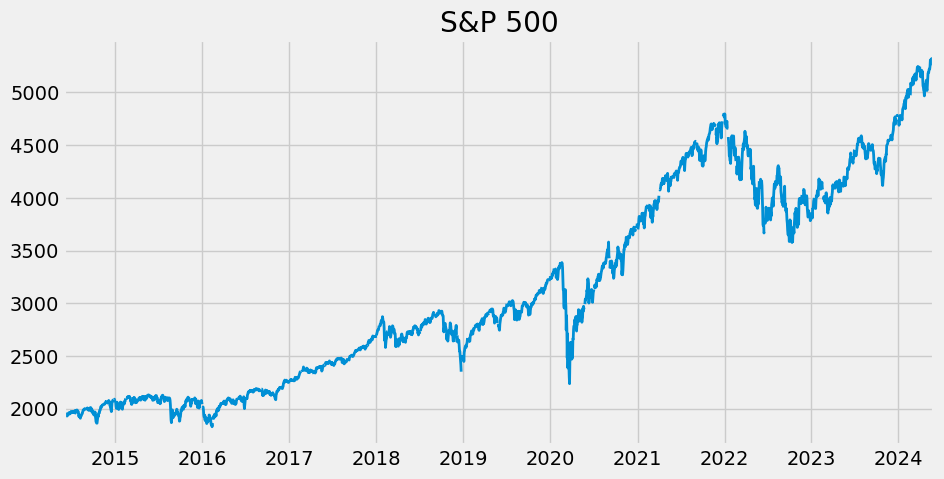

In [25]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

## Pull and Join Multiple Data Series

In [26]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [27]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [28]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [29]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [30]:
# Plot States Unemployment Rate
px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State

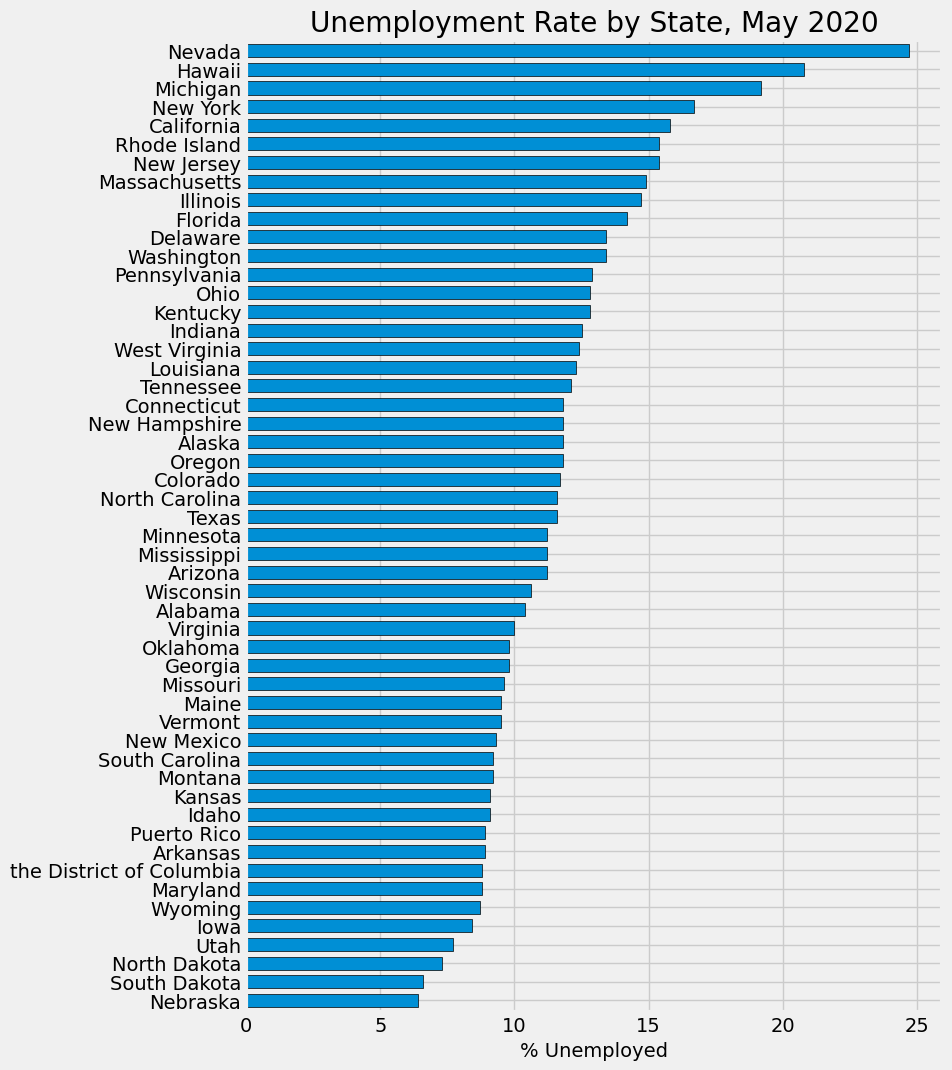

In [31]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [32]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [33]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state

In [34]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

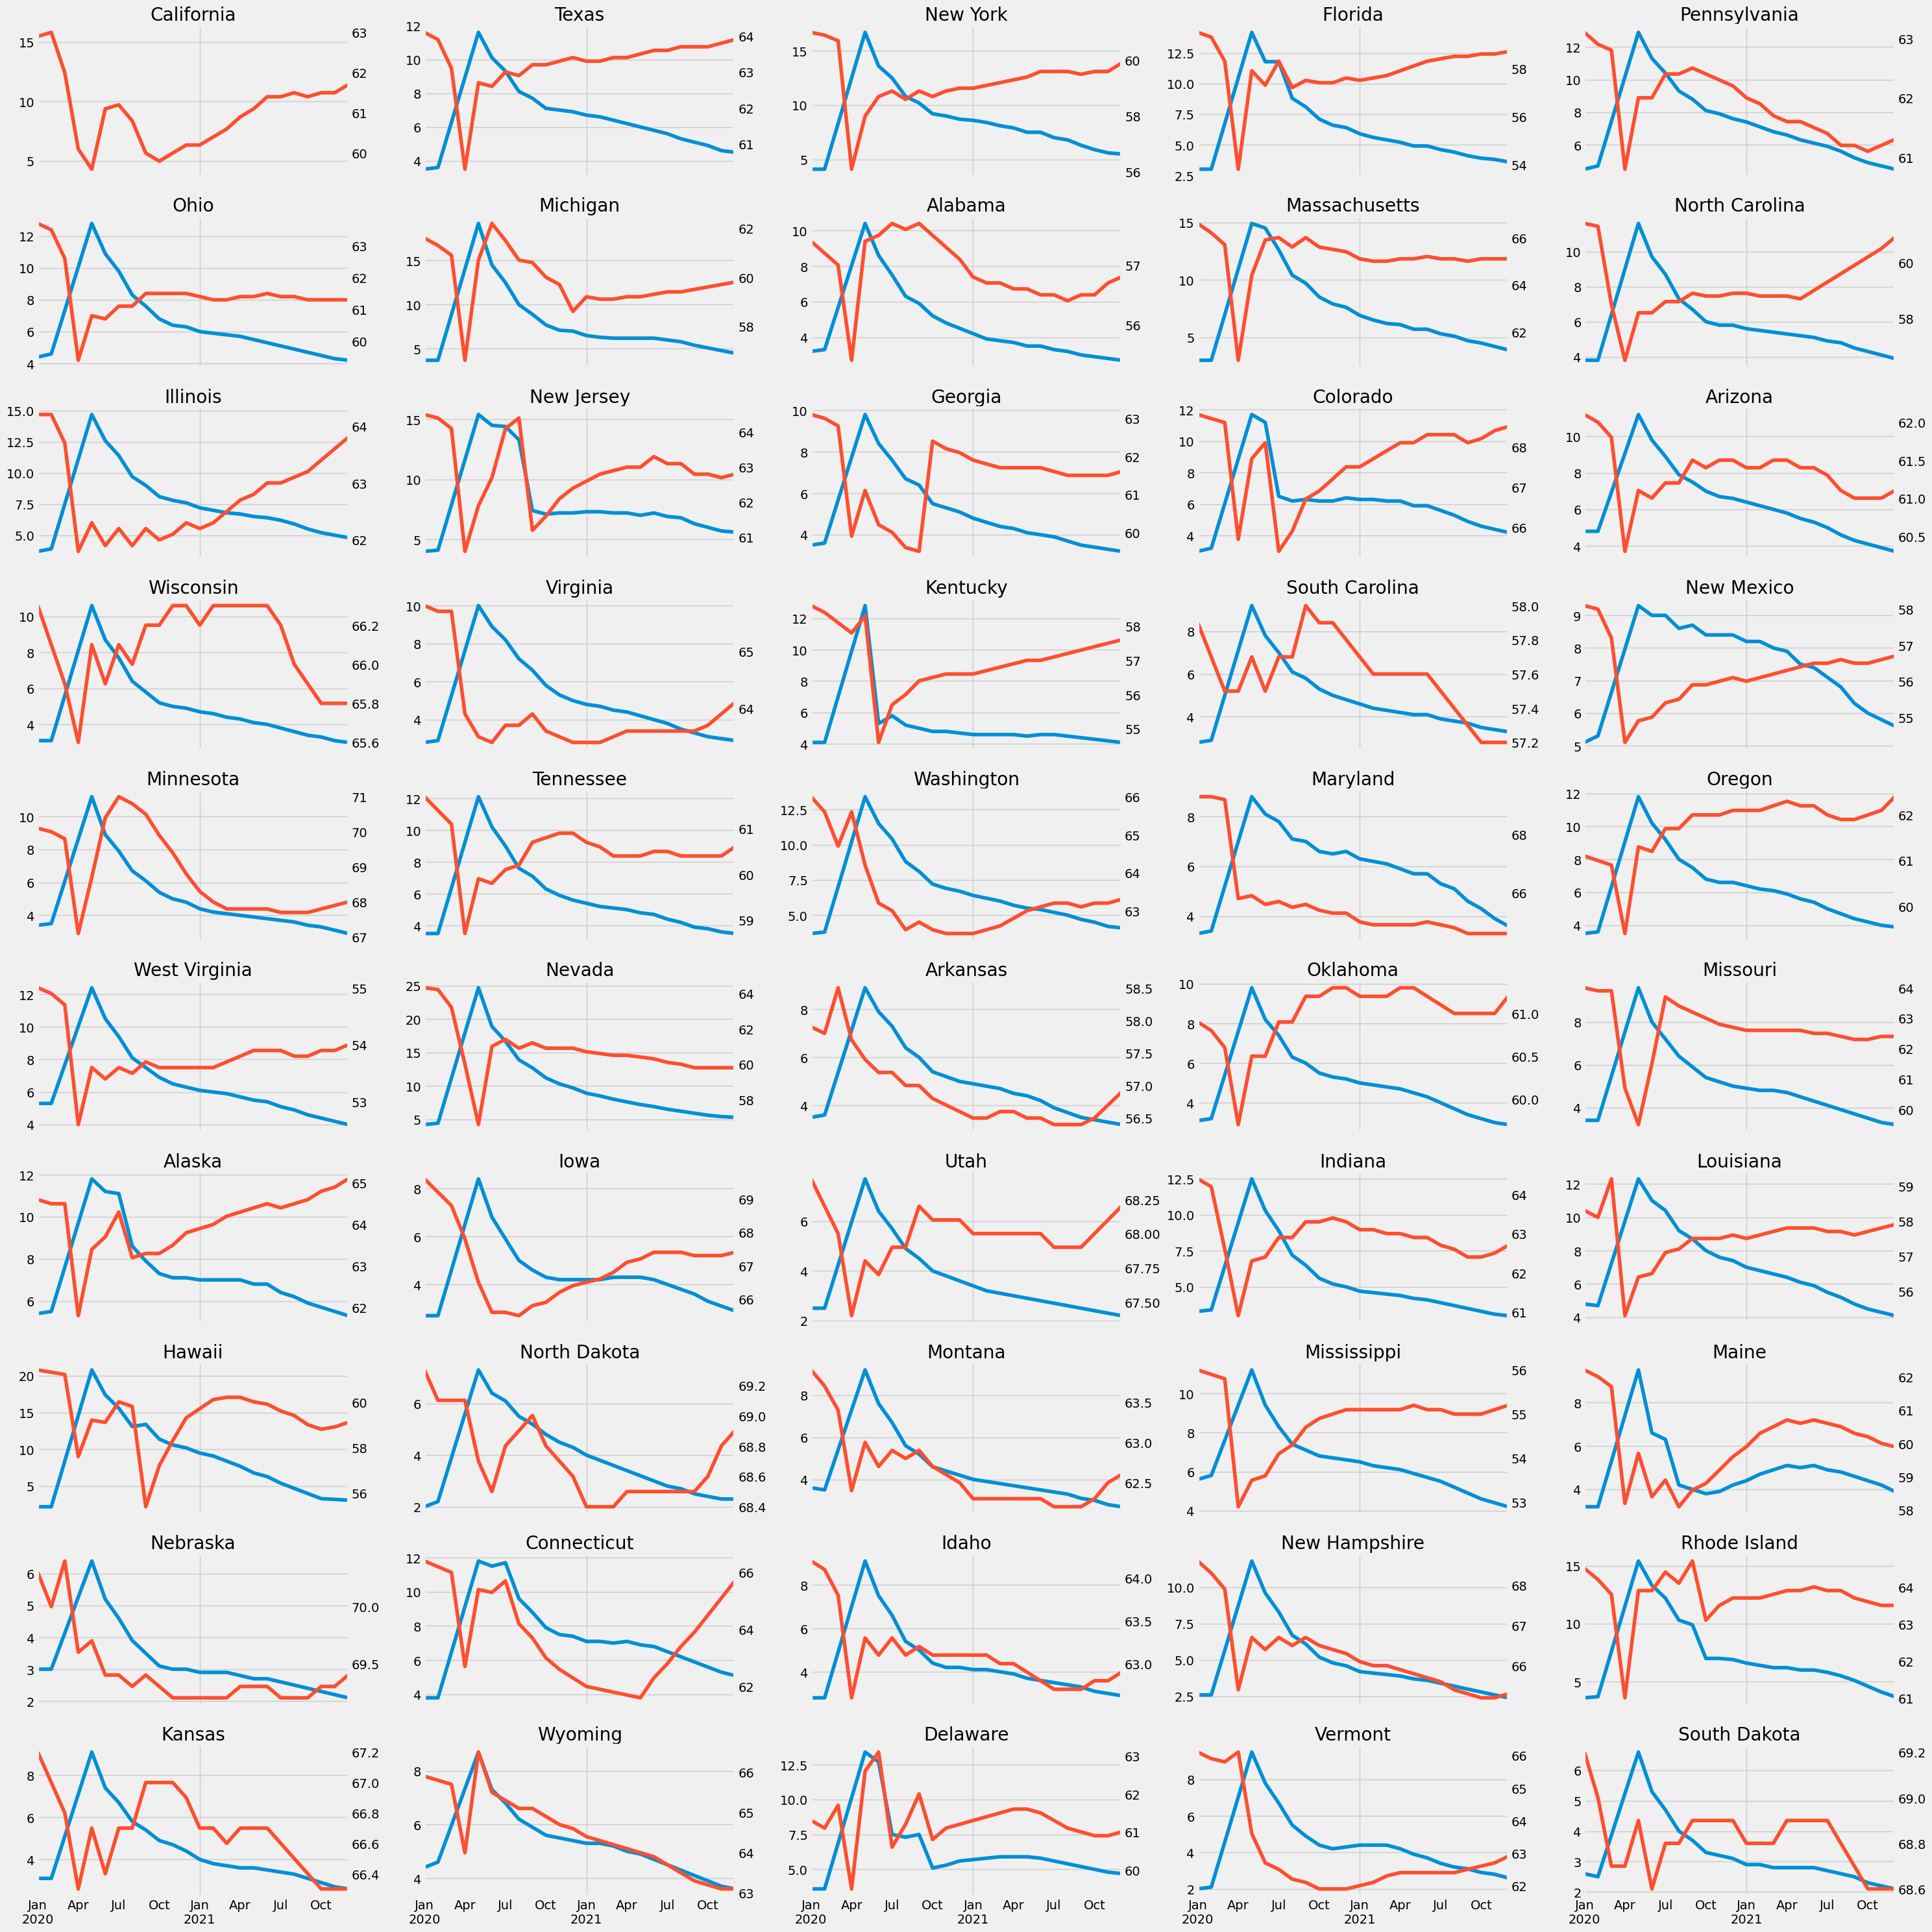

In [35]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

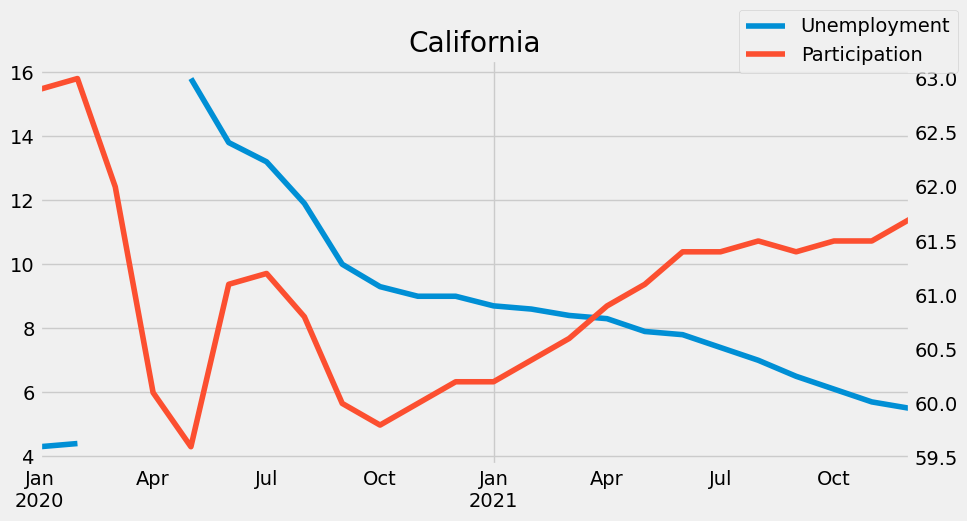

In [36]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()